# Part 1. Data Wrangling:

This capstone looks at tweets from a 5-year period of the CEOS of several companies. Their respective stocks are collected and the tweets are analyzed to determine if the closing price of a stock can be determined from the CEO's tweets. The CEOs, their twitter username, and their associated stocks are as follows:  
 - Elon Musk : '@elonmusk': Tesla (TSLA)
 - Aaron Levie : '@levie': Box (BOX)
 - Jack Dorsey : '@jack': Twitter (TWTR)
 - Marc Benioff : '@Benioff': Salesforce (CRM)
 - Richard Branson: @richardbranson: Virgin Galactic (SPCE)
 - John Legere: @JohnLegere: T-Mobile (TMUS)
 
 
These CEOs were selected with the following criteria:  
 - the stock must be a publicly traded company for at least 5 years.
 - the CEO must have tweeted at least 500 times over that span of that 5 years.
 


## Objective: 

To scrape the tweets and stocks from the CEOS, clean these data by standardizing dates and times, dealing with null values, and then to combine these cleaned dataframes into a single dataframe for EDA and machine learning. All datetimes are in EST.

In [117]:
import os
import warnings
warnings.filterwarnings('ignore')

import nest_asyncio
nest_asyncio.apply()


%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Where to save the figures
PROJECT_ROOT_DIR = "."
PROJECT_ID = "stock_movement_tweet_data_wrangling"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", PROJECT_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=72):
    """ 
    resolution quality
    300 high 
    150 medium
    72 low
    """
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [118]:
from utils import *

# Collecting Data

## Collecting Stocks 

In [40]:
# Import 5-year daily tesla stocks from Yahoo Finance and store in dataframe

#tsla = yf.Ticker('TSLA')
#box = yf.Ticker('BOX')
#twtr = yf.Ticker('TWTR')
#crm = yf.Ticker('CRM')
#spce = yf.Ticker('SPCE')
#tmus = yf.Ticker('TMUS')



# Convert to dataframes
#tsla_df = tsla.history(period = '5y')
#box_df = box.history(period = '5y')
#twtr_df = twtr.history(period = '5y')
#crm_df = crm.history(period = '5y')
#spce_df = spce.history(period='5y')
#tmus_df = tmus.history(period='5y')



stock_names = ['TSLA','BOX', 'TWTR','CRM','SPCE', 'TMUS']
stocks = {}
for stock in stock_names:
    stocks[stock] = pd.read_pickle(f'data/{stock}.pkl')

In [41]:
# Examine stocks
#stocks = { 'TSLA': tsla_df, 'BOX': box_df, 'TWTR': twtr_df, 'CRM':crm_df, 'SPCE': spce_df, 'TMUS':tmus_df}

for stock in stocks:
    print("===============")
    print(stock)
    print("===============")
    print(stocks[stock].info())
    print('\nFirst Row:')
    print(stocks[stock].head(1))
  
    stocks[stock].to_pickle(f'./data/{stock}.pkl')

TSLA
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1259 non-null   datetime64[ns]
 1   Open          1259 non-null   float64       
 2   High          1259 non-null   float64       
 3   Low           1259 non-null   float64       
 4   Close         1259 non-null   float64       
 5   Volume        1259 non-null   int64         
 6   Dividends     1259 non-null   int64         
 7   Stock Splits  1259 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 78.8 KB
None

First Row:
        Date       Open       High        Low      Close    Volume  Dividends  \
0 2016-08-23  44.863998  45.698002  44.560001  44.967999  23922000          0   

   Stock Splits  
0           0.0  
BOX
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 col

### 1.2.2 Combining the Stocks <a id='1.2.2_Combining_Stocks'></a>

In [42]:
# Get needed columns and change the date to lowercase

for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    stocks[stock] =  stocks[stock][['Date','Open', 'Close']]
    stocks[stock].columns = stocks[stock].columns.str.lower()

In [43]:
for stock in stocks:
    print(stock.upper())
    print("=======================")
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].min())
    print(stocks[stock][stocks[stock]['date'] == stocks[stock]['date']].max())
    print("")

TSLA
date     2016-08-23 00:00:00
open               36.220001
close              35.793999
dtype: object
date     2021-08-23 00:00:00
open              891.380005
close             883.090027
dtype: object

BOX
date     2016-08-23 00:00:00
open                    8.75
close                   9.12
dtype: object
date     2021-08-23 00:00:00
open                   29.25
close                  29.01
dtype: object

TWTR
date     2016-08-23 00:00:00
open                    14.3
close                  14.29
dtype: object
date     2021-08-23 00:00:00
open               78.360001
close              77.629997
dtype: object

CRM
date     2016-08-23 00:00:00
open               66.589996
close              68.410004
dtype: object
date     2021-08-23 00:00:00
open              283.470001
close                 281.25
dtype: object

SPCE
date     2017-09-29 00:00:00
open                    7.19
close                   7.22
dtype: object
date     2021-08-23 00:00:00
open                   58.59
close 

Our goal is to predict stock changes based off twitter data that occurs before the next opening or closing price. To get the data into a workable format, I will need to combine the opening and closing stock prices and sort them by date and time.

In [44]:
for stock in stocks:
    stocks[stock] = organize_stocks(stocks[stock])

### 1.2.3 Examine Collected Stocks <a id='1.2.3_Examine_Stocks'></a>

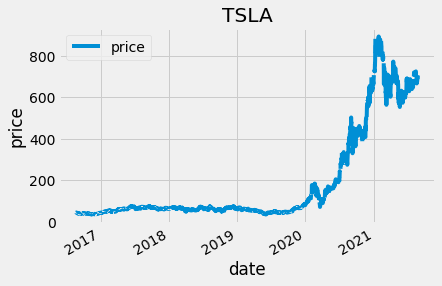

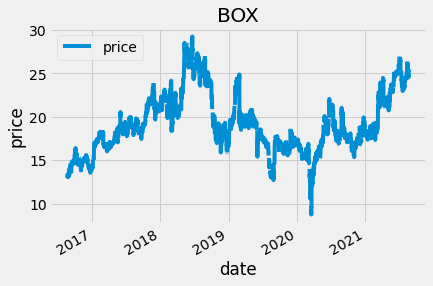

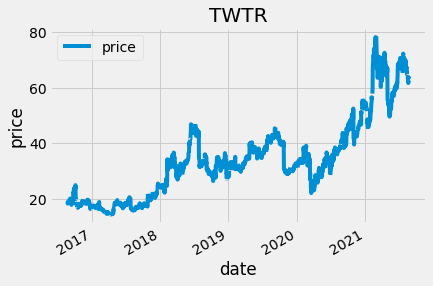

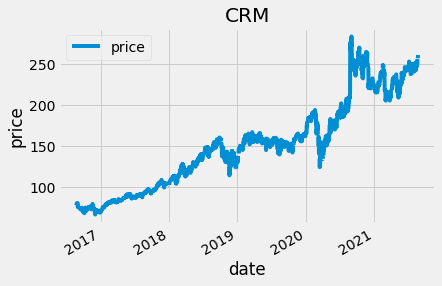

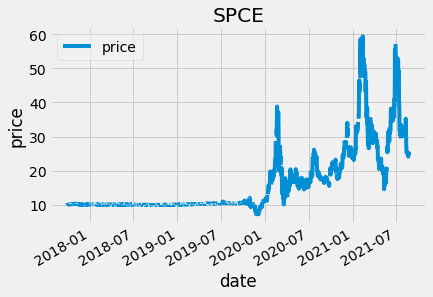

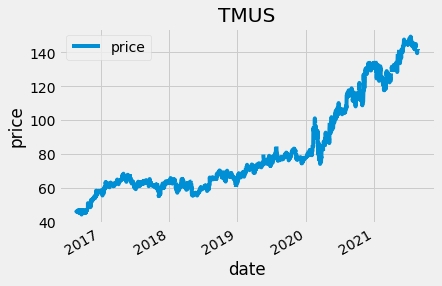

In [45]:
for stock in stocks:
    stocks[stock].plot()
    plt.xlabel('date', color='black')
    plt.ylabel('price', color='black')
    plt.title(stock, color='black')
    plt.xticks(color='black')
    plt.yticks(color='black')
    plt.savefig('./figures/data_wrangling/stocks_{}.png'.format(stock), bbox_inches='tight', tranparent=True)
    plt.show()
    
    

In [46]:
for stock in stocks:
    print(stocks[stock].isna().sum())

price    1136
dtype: int64
price    1136
dtype: int64
price    1136
dtype: int64
price    1136
dtype: int64
price    888
dtype: int64
price    1136
dtype: int64


All of the stocks have the same number of values with the exception of Virgin Galactic, which has been on the NYSE for less than the 5 year max alloted by yfinance. No missing numbers are detected.

### De-trending the time series stock data 

We will use the percent change in the stock prices as a target that we will later bin into categories.  

In [47]:
for stock in stocks:
    stocks[stock]['percent change'] = stocks[stock]['price'].pct_change()
    stocks[stock].fillna(0, inplace=True)

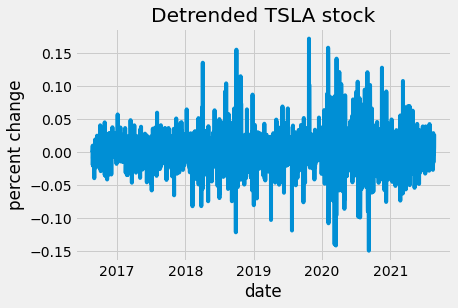

In [48]:
_ = plt.plot(stocks['TSLA'][['percent change']])
_ = plt.xlabel('date')
_ = plt.ylabel('percent change')
_ = plt.title('Detrended TSLA stock')
plt.savefig('./figures/data_wrangling/detrended_stock.png', bbox_inches='tight')

In [49]:
#for stock in stocks:
#    stocks[stock].to_pickle(f'./data/{stock}_df.pkl')

## 1.2.5 Collecting the tweets <a id='1.2.5_Collecting_Tweet'></a>
We will collect the CEOs tweets over the same time-span as the collected stocks

In [50]:
# Get the tweets from the CEOs of the companies
# Get user_ids in case of name changes. 

        
user_stocks = {'elonmusk':'TSLA', 'levie':'BOX','jack':'TWTR', 'Benioff':'CRM', 
            'richardbranson':'SPCE', 'JohnLegere':'TMUS'}

In [51]:
start_date = {}
for user in user_stocks:
    start_date[user] = dt.strftime(stocks[user_stocks[user]].reset_index().date.min(), '%Y-%m-%d %H:%M:%S')

In [52]:
usernames = list(user_stocks.keys())

In [53]:
#%%time

#ceos = []
#for user in usernames:
#    c = twint.Config()
#    c.Username = user
#    c.User_full = True
#    c.Count = True
#    c.Stats = True
#    c.Pandas = True
#    c.Store_pandas = True
#    c.Hide_output = True
#    c.Pandas_clean = True
#    c.Since = start_date[user]

    # run search
#    twint.run.Search(c)

# extract columns and save dataframe in list
#columns = twint.output.panda.Tweets_df.columns
#ceo = twint.output.panda.Tweets_df[columns]
#ceos.append(ceo)


ceos = pd.read_pickle('./data/ceos.pkl')
usernames = ['elonmusk', 'levie', 'jack', 'Benioff','richardbranson', 'JohnLegere']

In [54]:
ceos.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
0,1417453075892080641,1417427520266268677,2021-07-20 07:55:22 EDT,2021-07-20,07:55:22,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'vincent13031925', 'name': 'V...",,,,,None
1,1417390555001098246,1417251070989029376,2021-07-20 03:46:56 EDT,2021-07-20,03:46:56,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'blueorigin', 'name': 'Blue O...",,,,,None
2,1417293886897098762,1417278493428264963,2021-07-19 21:22:49 EDT,2021-07-19,21:22:49,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'SpacePadreIsle', 'name': 'SP...",,,,,None
3,1417277335863140363,1417277092090191884,2021-07-19 20:17:03 EDT,2021-07-19,20:17:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,"[{'screen_name': 'TLPN_Official', 'name': 'The...",,,,,None
4,1417274819461095432,1417274819461095432,2021-07-19 20:07:03 EDT,2021-07-19,20:07:03,-0400,44196397,elonmusk,Elon Musk,,...,,,,,[],,,,,None


In [55]:
len(ceos.columns)

37

Lets look at the number of tweets and the dates they span for each executive.

In [56]:
CEOS = {}
for user in usernames:
    CEOS[user] = ceos[ceos['username'] == user]   

In [57]:
print(len(CEOS['elonmusk']['tweet']))

11622


In [58]:
for CEO in CEOS:

    CEOS[CEO]['reply_length'] = -1
    for i in range(len(CEOS[CEO])):
        CEOS[CEO]['reply_length'].loc[i] = len(CEOS[CEO]['reply_to'].loc[i])

    CEOS[CEO] = CEOS[CEO][CEOS[CEO]['reply_length'] == 0]
    CEOS[CEO].reset_index(drop=True, inplace=True)

In [59]:
print (len(CEOS['elonmusk']))

2967


In [60]:
start_date = {}
end_date = {}
for CEO in CEOS:
    print(CEO.upper())
    print('number of tweets:', len(CEOS[CEO]))
    print('date range:')
    start_date[CEO] = CEOS[CEO]['date'].min()
    end_date[CEO] = CEOS[CEO]['date'].max()
    print(start_date[CEO], '---' ,end_date[CEO])
    print("")

ELONMUSK
number of tweets: 2967
date range:
2016-07-20 --- 2021-07-19

LEVIE
number of tweets: 1183
date range:
2016-07-21 --- 2021-07-20

JACK
number of tweets: 2474
date range:
2016-07-21 --- 2021-07-20

BENIOFF
number of tweets: 4385
date range:
2016-07-20 --- 2021-05-28

RICHARDBRANSON
number of tweets: 6684
date range:
2017-09-29 --- 2021-07-20

JOHNLEGERE
number of tweets: 16623
date range:
2016-07-20 --- 2021-07-20



In [61]:
#all_tweets = pd.DataFrame()
#for CEO in CEOS:
#    all_tweets = all_tweets.append(CEOS[CEO])
    
#all_tweets.to_pickle(f'/Users/tylerpoore/Workspace/Spring Board/Projects/Capstone_notebooks/Capstone_1_Final/data/ceos.pkl')

## Examing and Cleaning the Data 

### Examining The Tweets 

In [62]:
# Examine the scraped data

for CEO in CEOS:
    print("================")
    print(CEO)
    print("================")
    print(CEOS[CEO][['date','tweet']].head(3))

elonmusk
         date                                              tweet
0  2021-07-19  Full test duration firing of 3 Raptors on Supe...
1  2021-07-18               Cybrrrtruck  https://t.co/rdiMFdYOS6
2  2021-07-17  Fred Astaire is incredible. Worth watching his...
levie
         date                                              tweet
0  2021-07-20        This is a very sad take on entrepreneurship
1  2021-07-20  Space innovation from many ventures is just pl...
2  2021-07-20                   Amazing  https://t.co/YGDtOVvm92
jack
         date                                              tweet
0  2021-07-20  Square Banking is live! Checking, savings, deb...
1  2021-07-19                            https://t.co/Sip86oI6fU
2  2021-07-17                        ❤️  https://t.co/c4yEfiys5v
Benioff
         date                                              tweet
0  2021-05-28  Wonderful to be on @MadMoneyOnCNBC tonight ann...
1  2021-05-27  It’s happening! @Dreamforce ❤️ https://t.co/7V.

The raw twitter data has mentions, urls, emojis, and other languages besides english at first glance. 

In [63]:
# Examine the tweet columns

CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 38 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2967 non-null   object
 1   conversation_id  2967 non-null   object
 2   created_at       2967 non-null   object
 3   date             2967 non-null   object
 4   time             2967 non-null   object
 5   timezone         2967 non-null   object
 6   user_id          2967 non-null   int64 
 7   username         2967 non-null   object
 8   name             2967 non-null   object
 9   place            2967 non-null   object
 10  tweet            2967 non-null   object
 11  language         2967 non-null   object
 12  mentions         2967 non-null   object
 13  urls             2967 non-null   object
 14  photos           2967 non-null   object
 15  replies_count    2967 non-null   int64 
 16  retweets_count   2967 non-null   int64 
 17  likes_count      2967 non-null   

Looking at the dataframe columns entries, there are no missing values. That may be because they are using a different character than NaN, and I will look into this later. Most are of type object, but there are 4 integer columns: user_id; reply, retweet, and like counts; and video for some odd reason; and 1 boolean retweet column. All of the columns are the same type. Let's examine the columns.

In [64]:
# Look at sample integer columns

CEOS['elonmusk'].select_dtypes(include=['int']).describe()

,user_id,replies_count,retweets_count,likes_count,video,reply_length
count,2967.0,2967.000000,2967.000000,2.967000e+03,2967.000000,2967.0
mean,44196397.0,3161.311426,9051.424671,8.390999e+04,0.195147,0.0
std,0.0,7102.102366,19126.534672,1.267403e+05,0.396380,0.0
min,44196397.0,2.000000,0.000000,1.020000e+02,0.000000,0.0
25%,44196397.0,441.500000,1001.500000,1.278500e+04,0.000000,0.0
50%,44196397.0,1003.000000,2793.000000,3.468000e+04,0.000000,0.0
75%,44196397.0,2557.000000,8808.500000,9.851200e+04,0.000000,0.0
max,44196397.0,126196.000000,355536.000000,1.574723e+06,1.000000,0.0


The video column looks like a boolean

In [65]:
CEOS['elonmusk']['video'].nunique()

2

In [66]:
CEOS['elonmusk']['video'].sum()

579

In [67]:
# Look at first set of object columns

CEOS['elonmusk'].select_dtypes(include=['object']).describe()

,id,conversation_id,created_at,date,time,timezone,username,name,place,tweet,...,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,search
count,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967,...,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967
unique,2967,2137,2966,1068,2895,1,1,1,1,2961,...,1,1,1,1,1,1,1,1,1,1
top,1417274819461095432,1162218267932446724,2018-04-01 18:02:31 EDT,2018-02-06,11:05:22,-0400,elonmusk,Elon Musk,,Off Twitter for a while,...,,,,,[],,,,,None
freq,1,7,2,14,2,2967,2967,2967,2967,2,...,2967,2967,2967,2967,2967,2967,2967,2967,2967,2967


A lot of these columns I will exclude as they likely won't contribute any contributable features to predicting the stock price. I will determine the language after cleaning the tweets.

In [68]:
CEOS['elonmusk'][['tweet', 'mentions', 'urls', 'photos','hashtags', 'cashtags', 'quote_url']].describe()

,tweet,mentions,urls,photos,hashtags,cashtags,quote_url
count,2967,2967,2967,2967,2967,2967,2967
unique,2961,90,574,514,12,1,372
top,Off Twitter for a while,[],[],[],[],[],
freq,2,2806,2358,2454,2954,2967,2588


The missing values are represented by empty lists. Let's turn this into a better represenation of missing values.

Let's look at the languages first.

In [69]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts()[:5])

ELONMUSK
en     2613
und     246
tl       15
fr       11
de       11
Name: language, dtype: int64
LEVIE
en     1156
und      19
es        2
it        2
fr        2
Name: language, dtype: int64
JACK
en     1875
und     532
es       12
fr       11
in        9
Name: language, dtype: int64
BENIOFF
en     4288
und      48
fr       16
pt        7
es        6
Name: language, dtype: int64
RICHARDBRANSON
en     6627
und      48
fr        3
tl        3
ro        2
Name: language, dtype: int64
JOHNLEGERE
en     13853
und     2686
pt        22
es        17
fr         7
Name: language, dtype: int64


Let's see what und is

In [70]:
CEOS['elonmusk']['tweet'][CEOS['elonmusk']['language'] == 'und']

4                       https://t.co/d4ZOSKZESP
9                    🤯  https://t.co/Z11qszTY4v
22                      https://t.co/O3BGaFuMDO
24                      https://t.co/TQZ9QvcwH1
29      @WholeMarsBlog  https://t.co/ftFbmwIJz6
                         ...                   
2725                             @D1sneyNut Yes
2737                    https://t.co/3YSXZq1EVj
2745                    https://t.co/6Ve3YJoStm
2837                            @chemisdrey yes
2958                    https://t.co/Kgkz1Z3FwJ
Name: tweet, Length: 246, dtype: object

It looks like und occurs when there are a lot of mentions, links, or emojis, so I will keep this and clean them later. 

In [71]:
# Keep the en and und languages 
for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][(CEOS[CEO]['language'] == 'en') | (CEOS[CEO]['language'] == 'und')]
    CEOS[CEO].reset_index(inplace=True, drop=True)

In [72]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO]['language'].value_counts())
    print(CEOS[CEO]['language'].value_counts().sum())

ELONMUSK
en     2613
und     246
Name: language, dtype: int64
2859
LEVIE
en     1156
und      19
Name: language, dtype: int64
1175
JACK
en     1875
und     532
Name: language, dtype: int64
2407
BENIOFF
en     4288
und      48
Name: language, dtype: int64
4336
RICHARDBRANSON
en     6627
und      48
Name: language, dtype: int64
6675
JOHNLEGERE
en     13853
und     2686
Name: language, dtype: int64
16539


### 1.3.2 Converting to Missing Values and Categorical Features <a id='1.3.2_Missing'></a>

In [76]:
for CEO in CEOS:
    print(CEO.upper())
    CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].head(3)

ELONMUSK
LEVIE
JACK
BENIOFF
RICHARDBRANSON
JOHNLEGERE


In [77]:
# Convert empty lists into NaNs for easier processing
for CEO in CEOS:
    CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']] = CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags','cashtags', 'thumbnail']].applymap(lambda x: np.nan if len(x) == 0 else x)
    

In [78]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].info())

ELONMUSK
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2859 entries, 0 to 2858
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mentions   157 non-null    object 
 1   urls       583 non-null    object 
 2   photos     486 non-null    object 
 3   hashtags   13 non-null     object 
 4   cashtags   0 non-null      float64
 5   thumbnail  549 non-null    object 
dtypes: float64(1), object(5)
memory usage: 134.1+ KB
None
LEVIE
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   mentions   70 non-null     object
 1   urls       160 non-null    object
 2   photos     122 non-null    object
 3   hashtags   11 non-null     object
 4   cashtags   1 non-null      object
 5   thumbnail  135 non-null    object
dtypes: object(6)
memory usage: 55.2+ KB
None
JACK
<class 'pandas.core.frame.DataF

In [79]:
for CEO in CEOS:
    print(CEO.upper())
    print('\n')
    print('missing values')
    print('===============')
    print(CEOS[CEO][['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']].isna().sum())
    print('\n')

ELONMUSK


missing values
mentions     2702
urls         2276
photos       2373
hashtags     2846
cashtags     2859
thumbnail    2310
dtype: int64


LEVIE


missing values
mentions     1105
urls         1015
photos       1053
hashtags     1164
cashtags     1174
thumbnail    1040
dtype: int64


JACK


missing values
mentions     1864
urls         1335
photos       1972
hashtags     2063
cashtags     2404
thumbnail    1964
dtype: int64


BENIOFF


missing values
mentions     2111
urls         1810
photos       2761
hashtags     4012
cashtags     4336
thumbnail    2392
dtype: int64


RICHARDBRANSON


missing values
mentions     3384
urls          373
photos       1217
hashtags     4153
cashtags     6675
thumbnail     744
dtype: int64


JOHNLEGERE


missing values
mentions     11122
urls          9751
photos       10816
hashtags      9679
cashtags     16342
thumbnail     9964
dtype: int64




In [80]:
categ = ['mentions', 'urls', 'photos', 'hashtags', 'cashtags', 'thumbnail']
for categorical in categ:
    print(categorical.upper())
    print(CEOS['JohnLegere'][categorical][~CEOS['JohnLegere'][categorical].isna()])
    print('===========')

MENTIONS
6        [{'screen_name': 'lifehacker', 'name': 'lifeha...
18       [{'screen_name': 'neilbarua', 'name': 'neil ba...
20       [{'screen_name': 'candace_parker', 'name': 'ca...
29       [{'screen_name': 'coolcatsnft', 'name': 'cool ...
43       [{'screen_name': 'richardbranson', 'name': 'ri...
                               ...                        
16532    [{'screen_name': 'theorlandojones', 'name': 'o...
16533    [{'screen_name': 'tmobile', 'name': 't-mobile'...
16534    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
16536    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
16537    [{'screen_name': 'att', 'name': 'at&t', 'id': ...
Name: mentions, Length: 5417, dtype: object
URLS
0        [https://www.buzzfeed.com/juliawilling/milo-an...
1        [https://www.theverge.com/2021/7/19/22580542/j...
3        [https://mashable.com/article/nasa-hubble-imag...
5        [https://www.buzzfeed.com/hannahloewentheil/pe...
6        [https://lifehacker.com/youve-probably-been-pi..

In [81]:
%%time
# Change categoricals to binary values
for CEO in CEOS:
    for categorical in categ:
        CEOS[CEO][categorical][CEOS[CEO][categorical].isnull()] = 0

for CEO in CEOS:
    for categorical in categ:
        for i in range(len(CEOS[CEO])):
            if CEOS[CEO][categorical].iloc[i] != 0:
                if categorical != 'thumbnail':
                    CEOS[CEO][categorical].iloc[i] = len(CEOS[CEO][categorical].iloc[i])
                else:
                    CEOS[CEO]['thumbnail'].iloc[i] = 1

CPU times: user 45.1 s, sys: 986 ms, total: 46.1 s
Wall time: 59.3 s


In [82]:
for CEO in CEOS:
    CEOS[CEO]['cashtags'] = CEOS[CEO]['cashtags'].astype(int)

In [112]:
for categorical in categ:
    print(CEOS['elonmusk'][categorical].value_counts())
    print('============')

0    728
1    101
2     22
3      6
4      2
Name: mentions, dtype: int64
0    493
1    237
2     77
3     31
4     14
5      4
6      1
8      1
7      1
Name: urls, dtype: int64
0    549
1    190
2     71
3     27
4      9
5      6
6      6
9      1
Name: photos, dtype: int64
0    849
1      9
5      1
Name: hashtags, dtype: int64


KeyError: 'cashtags'

### 1.3.3 Select Feature Columns and Combine Tweets for Each Day <a id='1.3.3_Features'></a>

I will be keeping most of the categorical and int features, but I won't be keeping the Cashtag column as it is empty for most of the tweets

In [113]:
# Set appropriate columns 

for CEO in CEOS:
    CEOS[CEO] = CEOS[CEO][[
        'date', 'time', 'username', 'tweet', 
        'mentions', 'hashtags', 'video', 'photos', 'urls']]

KeyError: "['time'] not in index"

In [114]:
# Need to change some of the features to integers
for CEO in CEOS:
    CEOS[CEO].fillna(0, inplace=True)

I will make a separate dataframe for these and append them to a dataframe of tweets that have been grouped by the date. Because I am looking how tweets impact the stock prices, I want to analyze tweets that happen before the price point. To this end I will be looking at the closing price, and tweets that occur on the same day after the market closes will be counted towards the following day. 

In [115]:
num_tweets = len(CEOS['elonmusk'])

In [87]:
num_tweets

2859

In [88]:
%%time 
# Takes ~1 min
for CEO in CEOS:
    CEOS[CEO] = combine_tweets(CEOS[CEO])

CPU times: user 49 s, sys: 1.23 s, total: 50.2 s
Wall time: 1min 9s


In [89]:
assert num_tweets == CEOS['elonmusk']['number of tweets'].sum()

In [90]:
for CEO in CEOS:
    print(CEO.upper())
    print('Number of days collected: {}'.format(CEOS[CEO].shape[0]))
    print("")

ELONMUSK
Number of days collected: 1273

LEVIE
Number of days collected: 862

JACK
Number of days collected: 1123

BENIOFF
Number of days collected: 1808

RICHARDBRANSON
Number of days collected: 1991

JOHNLEGERE
Number of days collected: 3363



## 1.4 Combining Stocks and Tweets DataFrames <a id='1.4_Combining_DataFrames'></a>

In [91]:
# merge stocks on to tweets
for stock in stocks:
    stocks[stock].reset_index(inplace=True)
    print(stock.upper)
    print(stocks[stock].head(3))
    print("")

<built-in method upper of str object at 0x7ff1aa1f9630>
                 date      price  percent change
0 2016-08-23 09:30:00  44.863998        0.000000
1 2016-08-23 16:00:00  44.967999        0.002318
2 2016-08-24 09:30:00  45.410000        0.009829

<built-in method upper of str object at 0x7ff1cf444770>
                 date  price  percent change
0 2016-08-23 09:30:00  12.95        0.000000
1 2016-08-23 16:00:00  13.30        0.027027
2 2016-08-24 09:30:00  13.40        0.007519

<built-in method upper of str object at 0x7ff1aa1f9e30>
                 date      price  percent change
0 2016-08-23 09:30:00  18.650000        0.000000
1 2016-08-23 16:00:00  18.690001        0.002145
2 2016-08-24 09:30:00  18.799999        0.005885

<built-in method upper of str object at 0x7ff1aa1f9330>
                 date      price  percent change
0 2016-08-23 09:30:00  77.820000        0.000000
1 2016-08-23 16:00:00  78.019997        0.002570
2 2016-08-24 09:30:00  78.000000       -0.000256

<bui

In [92]:
CEOS_list = list(CEOS.keys())
stocks_list = list(stocks.keys())

In [93]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].merge(stocks[stocks_list[i]], how='left', on='date')
    CEOS[CEOS_list[i]] = CEOS[CEOS_list[i]].sort_values(by = 'date').reset_index(drop=True)

In [94]:
for CEO in CEOS:
    print(CEO.upper())
    print(CEOS[CEO].head(3))

ELONMUSK
                 date                                              tweet  \
0 2016-07-20 16:00:00  California time Post should go live on Tesla w...   
1 2016-07-21 09:30:00  Autopilot prevents serious injury or death of ...   
2 2016-07-22 09:30:00  Looking forward to the Gigafactory opening par...   

   username  mentions  hashtags  video  photos  urls  number of tweets  price  \
0  elonmusk         0         0      0       0     0                 5    NaN   
1  elonmusk         0         0      1       1     0                 1    NaN   
2  elonmusk         0         0      0       0     0                 1    NaN   

   percent change  
0             NaN  
1             NaN  
2             NaN  
LEVIE
                 date                                              tweet  \
0 2016-07-21 09:30:00  One part of Twitter right now is a mad man tha...   
1 2016-07-21 16:00:00  Ted Cruz deserves kudos. Might be the only per...   
2 2016-07-22 09:30:00  Thiel just delivered the

### 1.4.1 Sort DataFrames and Clean <a id='1.4.1_Sorting_and_Cleaning'></a>

In [95]:
# Combine tweets that occur when market it closed and add to next market open.

for CEO in CEOS:
    CEOS[CEO] = fix_closed_market_tweets(CEOS[CEO])
    CEOS[CEO].reset_index('date', inplace=True)

In [96]:
# Check for missing values
for CEO in CEOS:
    print(CEO)
    print(CEOS[CEO].isna().sum())

elonmusk
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
levie
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
jack
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price               0
percent change      0
dtype: int64
Benioff
date                0
tweet               0
username            0
mentions            0
hashtags            0
video               0
photos              0
urls                0
number of tweets    0
price    

Because the latest tweets are before the next market opens, some of them have missing values and I will have to remove them for now.

In [97]:
for CEO in CEOS:
    print(CEOS[CEO].shape)

(859, 11)
(644, 11)
(861, 11)
(1329, 11)
(1388, 11)
(2275, 11)


Normalize data types

In [98]:
CEOS['elonmusk'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              859 non-null    datetime64[ns]
 1   tweet             859 non-null    object        
 2   username          859 non-null    object        
 3   mentions          859 non-null    int64         
 4   hashtags          859 non-null    int64         
 5   video             859 non-null    int64         
 6   photos            859 non-null    int64         
 7   urls              859 non-null    int64         
 8   number of tweets  859 non-null    int64         
 9   price             859 non-null    float64       
 10  percent change    859 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 73.9+ KB


In [99]:
ints_columns = CEOS['elonmusk'].select_dtypes(include=['int']).columns
floats_columns = CEOS['elonmusk'].select_dtypes(include=['float']).columns

In [100]:
for CEO in CEOS:
    CEOS[CEO][ints_columns] = CEOS[CEO][ints_columns].astype(int)
    CEOS[CEO][floats_columns] = CEOS[CEO][floats_columns].astype(float)

### 1.4.2 DataFrame Prices vs Original Stock Prices <a id='1.4.2_Looking_at_Original_Stocks'></a>

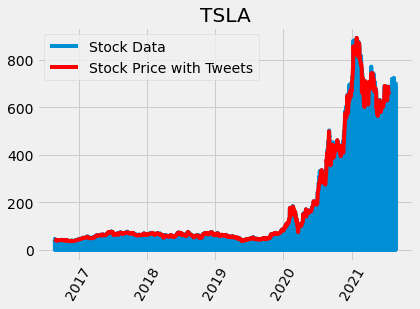

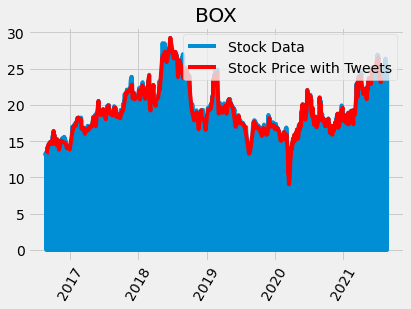

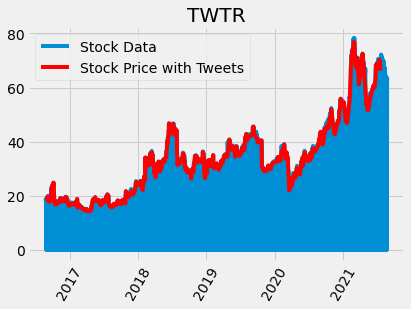

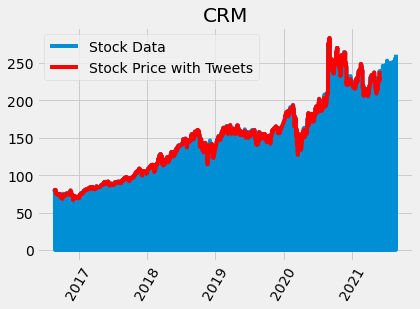

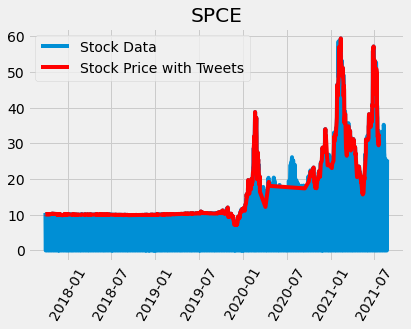

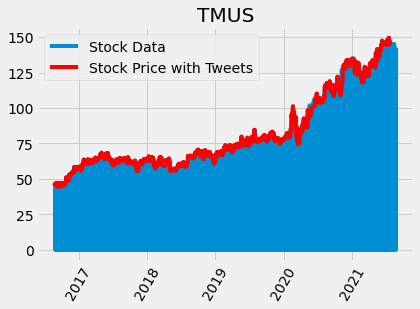

<Figure size 432x288 with 0 Axes>

In [101]:
# Let's look to see how well the full stock prices match the merged tweet and stock DataFrames
for i in range(len(stocks_list)):
    _ = plt.plot(stocks[stocks_list[i]]['date'], stocks[stocks_list[i]]['price'])
    _ = plt.plot(CEOS[CEOS_list[i]]['date'], CEOS[CEOS_list[i]]['price'], c='red')
    _ = plt.title(stocks_list[i])
    _ = plt.xticks(rotation=60)
    _ = plt.legend(['Stock Data', 'Stock Price with Tweets'])
    _ = plt.show()
    plt.savefig('./figures/data_wrangling/Price_Tweets_{}.png'.format(stocks_list[i]), bbox_inches='tight')

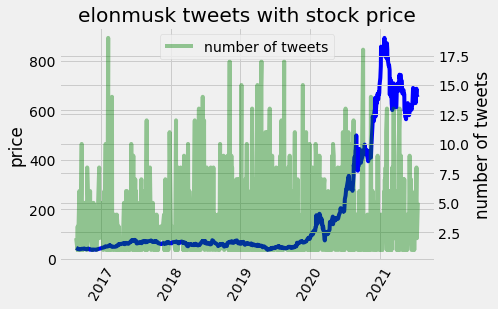

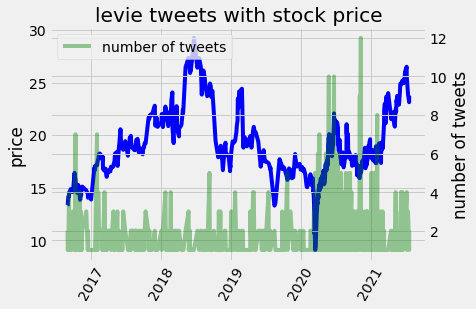

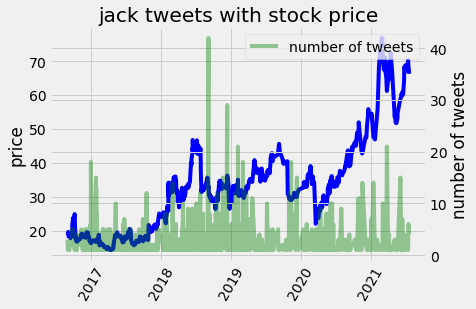

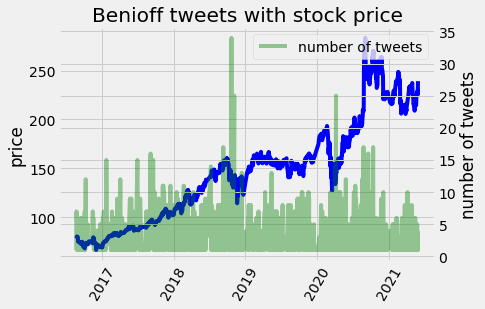

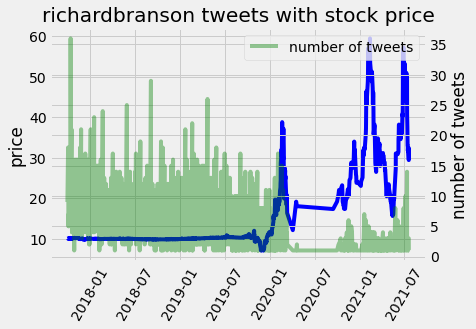

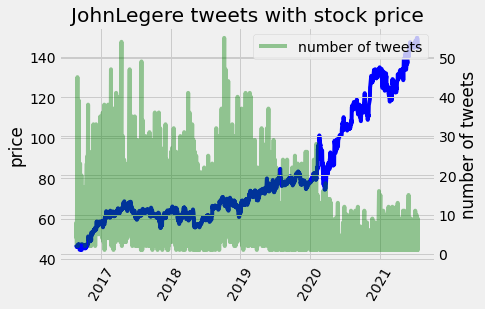

In [102]:
# Initalize a Figure and Axes
for CEO in CEOS:
    fig, ax = plt.subplots()

    ax.plot(CEOS[CEO]['date'], CEOS[CEO]['price'], color='blue')
    plt.ylabel('price')
    plt.title(f'{CEO} tweets with stock price')
    plt.xticks(rotation=60)

    # Create a twin Axes that shares the x-axis
    ax2 = ax.twinx()
    
    ax2.plot(CEOS[CEO]['date'], CEOS[CEO]['number of tweets'], color='g', alpha = 0.4)
    plt.ylabel('number of tweets')
    plt.legend(['number of tweets'])
    plt.savefig('./figures/data_wrangling/num_tweets_stock_price_{}.png'.format(CEO), bbox_inches='tight')
    plt.show()

In [103]:
test = CEOS['JohnLegere']
test2 = CEOS['richardbranson']

In [104]:
test = test[test['date'] <= '2019']
test2 = test2[test2['date'] >= '2020-07']

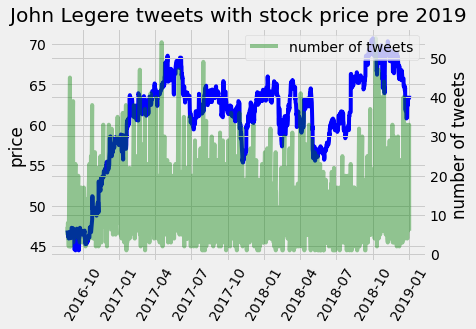

In [105]:
fig, ax = plt.subplots()

ax.plot(test['date'], test['price'], color='blue')
plt.ylabel('price')
plt.title('John Legere tweets with stock price pre 2019')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()


ax2.plot(test['date'], test['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_JohnLegere_pre2019', bbox_inches='tight')
plt.show()

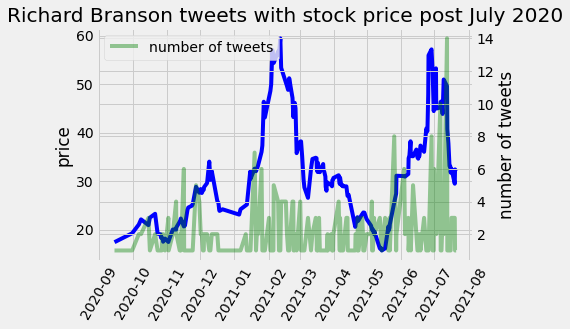

In [106]:
fig, ax = plt.subplots()

ax.plot(test2['date'], test2['price'], color='blue')
plt.ylabel('price')
plt.title('Richard Branson tweets with stock price post July 2020')
plt.xticks(rotation=60)

# Create a twin Axes that shares the x-axis
ax2 = ax.twinx()

ax2.plot(test2['date'], test2['number of tweets'], color='g', alpha = 0.4)
plt.ylabel('number of tweets')
plt.legend(['number of tweets'])
plt.savefig('./figures/data_wrangling/num_tweets_stock_price_richardbranson_post2020', bbox_inches='tight')
plt.show()

## 1.5 Saving Dataframes <a id='1.5_Exporting_DataFrames'></a>

In [107]:
for i in range(len(CEOS_list)):
    CEOS[CEOS_list[i]].to_pickle(f'./data/{CEOS_list[i]}_df.pkl')

In [108]:
tweet_stocks = pd.DataFrame()
for CEO in CEOS:
    tweet_stocks = tweet_stocks.append(CEOS[CEO])

In [109]:
tweet_stocks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7356 entries, 0 to 2274
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              7356 non-null   datetime64[ns]
 1   tweet             7356 non-null   object        
 2   username          7356 non-null   object        
 3   mentions          7356 non-null   int64         
 4   hashtags          7356 non-null   int64         
 5   video             7356 non-null   int64         
 6   photos            7356 non-null   int64         
 7   urls              7356 non-null   int64         
 8   number of tweets  7356 non-null   int64         
 9   price             7356 non-null   float64       
 10  percent change    7356 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 689.6+ KB


In [110]:
tweet_stocks.to_pickle(f'./data/tweet_stocks.pkl')